In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Abrir librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Configuraci√≥n general para lectura y limpieza
CFG = {
    "path": "C:/Users/bruno/Desktop/PROYECTO ULTIMO/EndInvFINAL12312016.csv",   # ruta a tu archivo
    "sep": ",",                     # separador CSV
    "encoding": "utf-8",
    "na_like": ["", "NA", "N/A", "-", "null", "None"]}

In [6]:
#importar archivo y configuro el archivo 
final_de_inventario="C:/Users/bruno/Desktop/PROYECTO ULTIMO/EndInvFINAL12312016.csv", #ruta del archivo
                  
                    

In [7]:

#aplico la configuracion a mi archivo
df_final_de_inventario=pd.read_csv(
                         CFG["path"],
                         sep=CFG["sep"],
                         encoding=CFG["encoding"],
                         na_values=CFG["na_like"]
) #leer archivo

In [8]:
df_final_de_inventario.shape#analizar la cantidad de filas y columnas

(224489, 9)

In [9]:
# Muestra informaci√≥n general de columnas, tipos de datos y nulos
df_final_de_inventario.info() 

# Vista r√°pida de las primeras filas
df_final_de_inventario.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
2  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
3  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   
4  1_HARDERSFIELD_75      1  HARDERSFIELD     75    Three Olives Tomato Vodka   

    Size  onHand  Price     endDate  
0  750mL      11  12.99  2016-12-31  
1  750mL       7  36.99  2016-12-31  
2  750mL       7  38.99  2016-12-31  
3  750mL       4  34.99  2016-12-31  
4  750mL       7  14.99  2016-12-31

In [10]:
# Estad√≠sticas num√©ricas b√°sicas; solo muestras las columnas numericas
df_final_de_inventario.describe()

Store          Brand         onHand          Price
count  224489.000000  224489.000000  224489.000000  224489.000000
mean       43.505740   14356.370513      21.763988      23.585583
std        23.326415   13118.467851      37.233576      79.202775
min         1.000000      58.000000       0.000000       0.490000
25%        23.000000    3798.000000       7.000000       9.990000
50%        44.000000    8259.000000      12.000000      14.990000
75%        66.000000   23965.000000      22.000000      23.490000
max        81.000000   90631.000000    3676.000000   13999.900000

In [11]:
# Conteo de valores nulos por columna
df_final_de_inventario.isna().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [12]:
#realizar copia 
df_final_de_inventario2=df_final_de_inventario.copy()

In [ ]:
#eliminar datos nulos 
df_final_de_inventario2 = df_final_de_inventario2.dropna(subset=["City"], how="all")


In [14]:
df_final_de_inventario2.isna().sum() #VERIFICO DATOS NUELOS.

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

In [15]:
df_final_de_inventario2.info() #Se corrobora que las filas tiene la misma cantidad de registros

<class 'pandas.core.frame.DataFrame'>
Index: 223205 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  223205 non-null  object 
 1   Store        223205 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        223205 non-null  int64  
 4   Description  223205 non-null  object 
 5   Size         223205 non-null  object 
 6   onHand       223205 non-null  int64  
 7   Price        223205 non-null  float64
 8   endDate      223205 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 17.0+ MB


In [16]:
print(df_final_de_inventario2.columns.tolist())

['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']


In [17]:
# 2Ô∏è‚É£ Renombrar todas las columnas a formato snake_case
df_final_de_inventario2.columns = (
    df_final_de_inventario2.columns
      .str.strip()                                     # elimina espacios al principio/fin
      .str.lower()                                    # convierte a min√∫sculas
      .str.normalize('NFKD')                          # quita tildes
      .str.encode('ascii', errors='ignore')           # quita caracteres especiales
      .str.decode('utf-8')
      .str.replace(r'\s+', '_', regex=True)           # reemplaza espacios por "_"
      .str.replace(r'[^a-z0-9_]', '', regex=True)     # elimina caracteres raros
)

# 4Ô∏è‚É£ Convertir esas columnas al tipo datetime (d√≠a/mes/a√±o)
df_final_de_inventario2["enddate"]= pd.to_datetime(df_final_de_inventario2["enddate"], errors='coerce', dayfirst=True)

# 5Ô∏è‚É£ (Opcional) Mostrar resultados
print("‚úÖ Columnas convertidas a snake_case:")
print(df_final_de_inventario2.columns.to_list())

print("\n‚úÖ Columnas de fecha convertidas al formato datetime:")
print(df_final_de_inventario2["enddate"].head())




‚úÖ Columnas convertidas a snake_case:
['inventoryid', 'store', 'city', 'brand', 'description', 'size', 'onhand', 'price', 'enddate']

‚úÖ Columnas de fecha convertidas al formato datetime:
0   2016-12-31
1   2016-12-31
2   2016-12-31
3   2016-12-31
4   2016-12-31
Name: enddate, dtype: datetime64[ns]


C:\Users\bruno\AppData\Local\Temp\ipykernel_22492\370376773.py:14: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_final_de_inventario2["enddate"]= pd.to_datetime(df_final_de_inventario2["enddate"], errors='coerce', dayfirst=True)


In [18]:
#Eliminar filas repetidas
print (f"Tama√±o del set antes de eliminar las filas repetidas: {df_final_de_inventario2.shape}")
df_final_de_inventario2.drop_duplicates(inplace=True)
print(f"Tama√±√±o del set despues de elimminar las filas repetidas: {df_final_de_inventario2.shape}")

Tama√±o del set antes de eliminar las filas repetidas: (223205, 9)
Tama√±√±o del set despues de elimminar las filas repetidas: (223205, 9)


In [19]:
def limpiar_decimales(columna):
    s = columna.astype(str).str.strip()
    
    # Detectar si la mayor√≠a usa coma como separador decimal
    muestra = s.sample(min(200, len(s)))  # revisar hasta 200 filas
    usa_coma_decimal = muestra.str.count(',').sum() > muestra.str.count('\.').sum()

    # Detectar sufijos 'k' (mil)
    tiene_k = s.str.contains('k', na=False)
     # Limpieza seg√∫n formato decimal
    if usa_coma_decimal:
        # Quita puntos de miles y cambia coma por punto decimal
        s = s.str.replace('.', '', regex=False)
        s = s.str.replace(',', '.', regex=False)
    else:
        # Quita comas de miles
        s = s.str.replace(',', '', regex=False)
    
    # Convierte a n√∫mero y redondea a 2 decimales
    return pd.to_numeric(s, errors='coerce').round(2)


<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
C:\Users\bruno\AppData\Local\Temp\ipykernel_22492\3383538492.py:6: SyntaxWarning: invalid escape sequence '\.'
  usa_coma_decimal = muestra.str.count(',').sum() > muestra.str.count('\.').sum()


In [20]:
df_final_de_inventario2['price'] = limpiar_decimales(df_final_de_inventario2['price'])
df_final_de_inventario2['onhand'] = limpiar_decimales(df_final_de_inventario2['onhand'])
df_final_de_inventario2['brand'] = limpiar_decimales(df_final_de_inventario2['brand'])


In [21]:
df_final_de_inventario2[['price', 'onhand', 'brand']].head()
print(df_final_de_inventario2.dtypes)


inventoryid            object
store                   int64
city                   object
brand                   int64
description            object
size                   object
onhand                  int64
price                 float64
enddate        datetime64[ns]
dtype: object


In [22]:
df_final_de_inventario2.describe()

store          brand         onhand          price  \
count  223205.000000  223205.000000  223205.000000  223205.000000   
mean       43.491391   14368.633736      21.889187      23.616610   
min         1.000000      58.000000       0.000000       0.490000   
25%        23.000000    3799.000000       7.000000       9.990000   
50%        44.000000    8264.000000      12.000000      14.990000   
75%        66.000000   23974.000000      22.000000      23.990000   
max        81.000000   90631.000000    3676.000000   13999.900000   
std        23.392643   13119.090024      37.303803      79.422296   

                   enddate  
count               223205  
mean   2016-12-31 00:00:00  
min    2016-12-31 00:00:00  
25%    2016-12-31 00:00:00  
50%    2016-12-31 00:00:00  
75%    2016-12-31 00:00:00  
max    2016-12-31 00:00:00  
std                    NaN

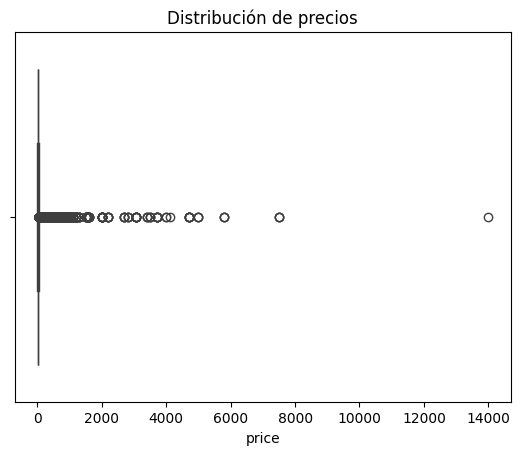

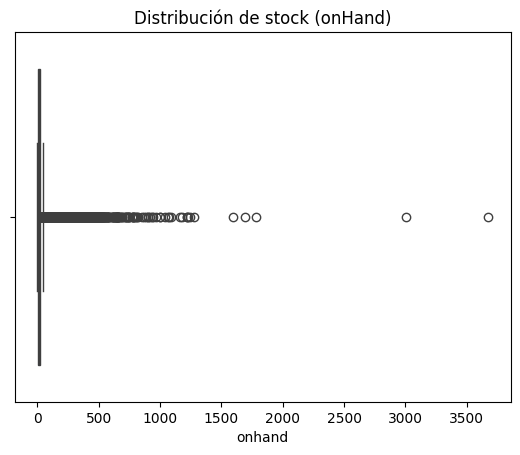

In [23]:
#Realizar grafico para ver valores extremos

sns.boxplot(x=df_final_de_inventario2['price'])
plt.title('Distribuci√≥n de precios')
plt.show()

sns.boxplot(x=df_final_de_inventario2['onhand'])
plt.title('Distribuci√≥n de stock (onHand)')
plt.show()


In [24]:
Q1 = df_final_de_inventario2['price'].quantile(0.25)
Q3 = df_final_de_inventario2['price'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_winsor = df_final_de_inventario2.copy()
df_winsor['price'] = np.where(
    df_winsor['price'] > lim_sup, lim_sup,
    np.where(df_winsor['price'] < lim_inf, lim_inf, df_winsor['price']))

print(f"Filas originales: {len(df_final_de_inventario2)}")
print(f"Filas despu√©s del filtrado: {len(df_winsor)}")
print(f"L√≠mites usados: {lim_inf:.2f} a {lim_sup:.2f}")


Filas originales: 223205
Filas despu√©s del filtrado: 223205
L√≠mites usados: -11.01 a 44.99


In [25]:
Q1 = df_final_de_inventario2['onhand'].quantile(0.25)
Q3 = df_final_de_inventario2['onhand'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_winsor['onhand'] = np.where(
    df_winsor['onhand'] > lim_sup, lim_sup,
    np.where(df_winsor['onhand'] < lim_inf, lim_inf, df_winsor['onhand']))

print(f"Filas originales: {len(df_final_de_inventario2)}")
print(f"Filas despu√©s del filtrado: {len(df_winsor)}")
print(f"L√≠mites usados: {lim_inf:.2f} a {lim_sup:.2f}")

Filas originales: 223205
Filas despu√©s del filtrado: 223205
L√≠mites usados: -15.50 a 44.50


In [26]:
print("\nüìä Estad√≠sticas ANTES:")
print(df_final_de_inventario2[["price","onhand"]].describe())

print("\nüìä Estad√≠sticas DESPU√âS (winsorizado):")
print(df_winsor[["price", "onhand"]].describe())


üìä Estad√≠sticas ANTES:
               price         onhand
count  223205.000000  223205.000000
mean       23.616610      21.889187
std        79.422296      37.303803
min         0.490000       0.000000
25%         9.990000       7.000000
50%        14.990000      12.000000
75%        23.990000      22.000000
max     13999.900000    3676.000000

üìä Estad√≠sticas DESPU√âS (winsorizado):
               price         onhand
count  223205.000000  223205.000000
mean       18.455982      16.451280
std        11.925975      13.153494
min         0.490000       0.000000
25%         9.990000       7.000000
50%        14.990000      12.000000
75%        23.990000      22.000000
max        44.990000      44.500000


In [27]:
# Exportar el DataFrame limpio (sin √≠ndices)
df_winsor.to_csv("datos_limpios.csv", index=False,sep=",", encoding='utf-8')

print("‚úÖ Archivo 'datos_limpios.csv' guardado correctamente en la carpeta del proyecto.")

‚úÖ Archivo 'datos_limpios.csv' guardado correctamente en la carpeta del proyecto.
